In [155]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
cali_path = "C:/Users/uig86510/Desktop/archive/housing.csv"
data = pd.read_csv(cali_path)

In [157]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# EXPLORING THE DATA

In [158]:
#dropping data with null values
data.dropna(inplace = True)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [160]:
#splitting the data to training and testing data (X and Y)
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [161]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [162]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
#0.2 is the desired value in most cases, it reserves 20 percent of the data for evaluating

In [164]:
#to analyze some basic correlation
train_data = X_train.join(y_train)

In [165]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1476,-122.04,37.96,16.0,2913.0,723.0,1705.0,693.0,2.9097,NEAR BAY,106300.0
8666,-118.43,33.83,19.0,6206.0,1611.0,2455.0,1472.0,5.1450,NEAR OCEAN,420200.0
1257,-121.65,38.03,28.0,3144.0,694.0,1095.0,482.0,3.4402,INLAND,192400.0
9096,-118.38,34.58,18.0,1859.0,375.0,913.0,372.0,4.3456,INLAND,148900.0
9327,-122.52,37.95,37.0,350.0,57.0,179.0,69.0,6.2862,NEAR BAY,500001.0
...,...,...,...,...,...,...,...,...,...,...
5262,-118.52,34.05,45.0,1814.0,325.0,709.0,311.0,4.8250,<1H OCEAN,500001.0
9431,-122.96,38.26,20.0,1982.0,358.0,308.0,132.0,3.1429,NEAR OCEAN,240900.0
2967,-119.12,35.33,4.0,8574.0,1489.0,4250.0,1444.0,5.1036,INLAND,103400.0
13130,-121.32,38.26,4.0,6125.0,1063.0,3077.0,953.0,4.1179,INLAND,134600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

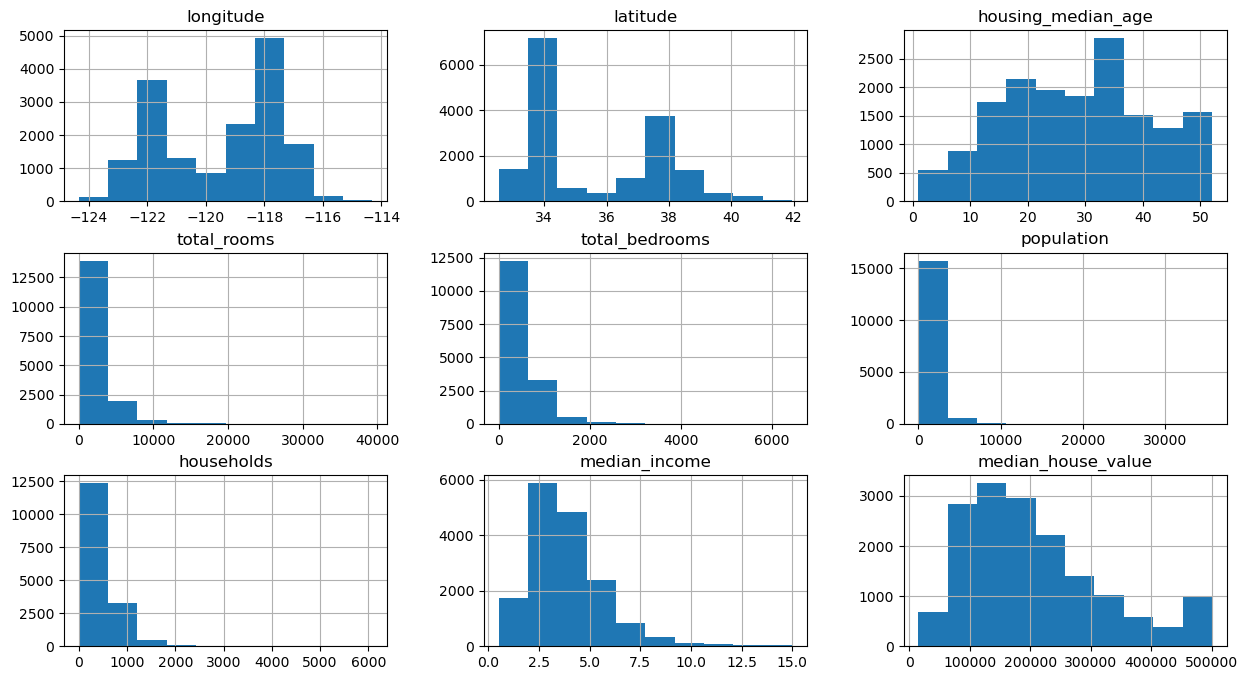

In [166]:
train_data.hist(figsize = (15,8))

In [167]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924548,-0.107704,0.042320,0.066526,0.097370,0.053696,-0.014778,-0.050351
latitude,-0.924548,1.000000,0.010666,-0.034248,-0.064801,-0.106386,-0.069529,-0.080798,-0.140799
housing_median_age,-0.107704,0.010666,1.000000,-0.358649,-0.317607,-0.294035,-0.300983,-0.115227,0.109334
total_rooms,0.042320,-0.034248,-0.358649,1.000000,0.929071,0.854616,0.919008,0.199589,0.135652
total_bedrooms,0.066526,-0.064801,-0.317607,0.929071,1.000000,0.875893,0.980889,-0.009127,0.050955
population,0.097370,-0.106386,-0.294035,0.854616,0.875893,1.000000,0.904592,0.002819,-0.025841
households,0.053696,-0.069529,-0.300983,0.919008,0.980889,0.904592,1.000000,0.012172,0.065950
median_income,-0.014778,-0.080798,-0.115227,0.199589,-0.009127,0.002819,0.012172,1.000000,0.688160
median_house_value,-0.050351,-0.140799,0.109334,0.135652,0.050955,-0.025841,0.065950,0.688160,1.000000


<Axes: >

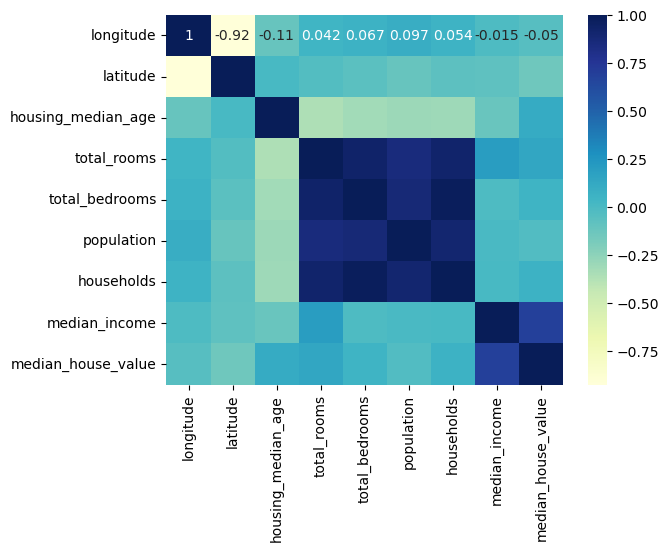

In [168]:
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu")

In [169]:
#the median_income correlates quite strongly with median_house_value

# DATA PREPROCESSING 

In [170]:
#trying to get the histogram look like bell curves
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

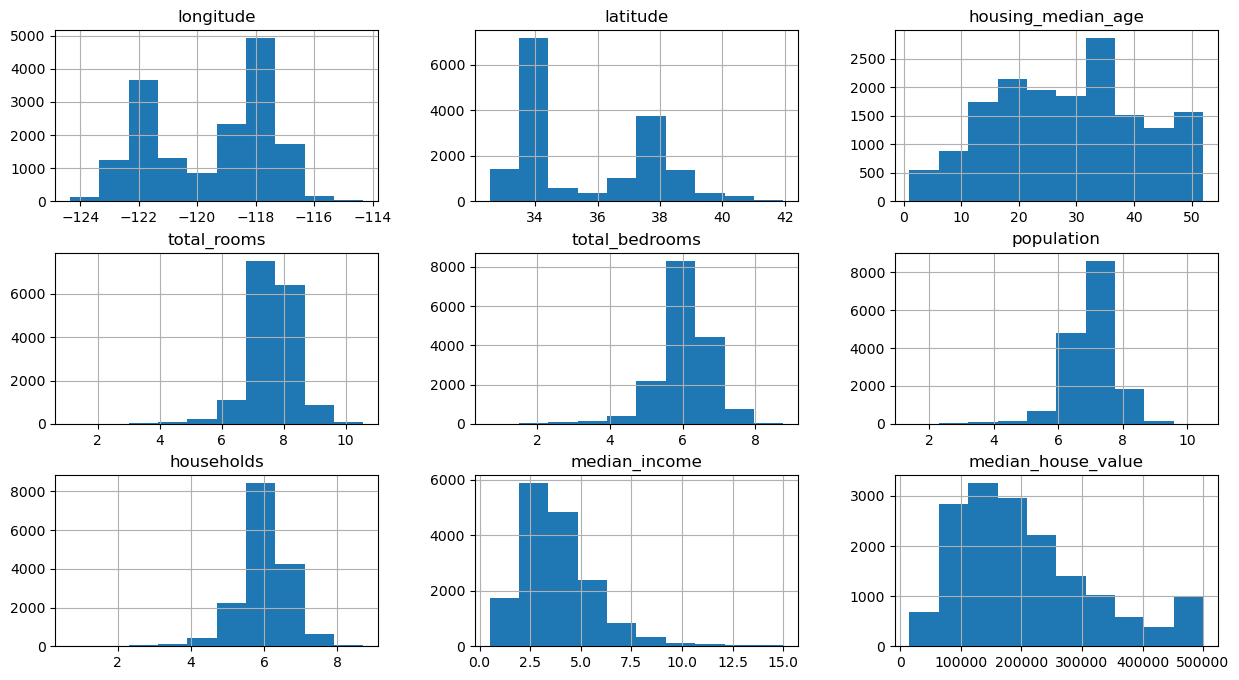

In [171]:
train_data.hist(figsize = (15,8))

<div class="alert alert-block alert-info">
<b>Tip:</b> Ocean Proximity is a good feature to be considered, but it has to be associated with a numeric value for prediction</div>

In [172]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7235
INLAND        5177
NEAR OCEAN    2104
NEAR BAY      1826
ISLAND           4
Name: count, dtype: int64

In [173]:
pd.get_dummies(train_data.ocean_proximity, dtype = int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1476,0,0,0,1,0
8666,0,0,0,0,1
1257,0,1,0,0,0
9096,0,1,0,0,0
9327,0,0,0,1,0
...,...,...,...,...,...
5262,1,0,0,0,0
9431,0,0,0,0,1
2967,0,1,0,0,0
13130,0,1,0,0,0


In [174]:
#joining
train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype = int))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1476,-122.04,37.96,16.0,7.977282,6.584791,7.441907,6.542472,2.9097,NEAR BAY,106300.0,0,0,0,1,0
8666,-118.43,33.83,19.0,8.733433,7.385231,7.806289,7.295056,5.1450,NEAR OCEAN,420200.0,0,0,0,0,1
1257,-121.65,38.03,28.0,8.053569,6.543912,6.999422,6.180017,3.4402,INLAND,192400.0,0,1,0,0,0
9096,-118.38,34.58,18.0,7.528332,5.929589,6.817831,5.921578,4.3456,INLAND,148900.0,0,1,0,0,0
9327,-122.52,37.95,37.0,5.860786,4.060443,5.192957,4.248495,6.2862,NEAR BAY,500001.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,-118.52,34.05,45.0,7.503841,5.786897,6.565265,5.743003,4.8250,<1H OCEAN,500001.0,1,0,0,0,0
9431,-122.96,38.26,20.0,7.592366,5.883322,5.733341,4.890349,3.1429,NEAR OCEAN,240900.0,0,0,0,0,1
2967,-119.12,35.33,4.0,9.056606,7.306531,8.354910,7.275865,5.1036,INLAND,103400.0,0,1,0,0,0
13130,-121.32,38.26,4.0,8.720297,6.969791,8.032035,6.860664,4.1179,INLAND,134600.0,0,1,0,0,0


In [175]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)

In [176]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1476,-122.04,37.96,16.0,7.977282,6.584791,7.441907,6.542472,2.9097,106300.0,0,0,0,1,0
8666,-118.43,33.83,19.0,8.733433,7.385231,7.806289,7.295056,5.1450,420200.0,0,0,0,0,1
1257,-121.65,38.03,28.0,8.053569,6.543912,6.999422,6.180017,3.4402,192400.0,0,1,0,0,0
9096,-118.38,34.58,18.0,7.528332,5.929589,6.817831,5.921578,4.3456,148900.0,0,1,0,0,0
9327,-122.52,37.95,37.0,5.860786,4.060443,5.192957,4.248495,6.2862,500001.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,-118.52,34.05,45.0,7.503841,5.786897,6.565265,5.743003,4.8250,500001.0,1,0,0,0,0
9431,-122.96,38.26,20.0,7.592366,5.883322,5.733341,4.890349,3.1429,240900.0,0,0,0,0,1
2967,-119.12,35.33,4.0,9.056606,7.306531,8.354910,7.275865,5.1036,103400.0,0,1,0,0,0
13130,-121.32,38.26,4.0,8.720297,6.969791,8.032035,6.860664,4.1179,134600.0,0,1,0,0,0


<Axes: >

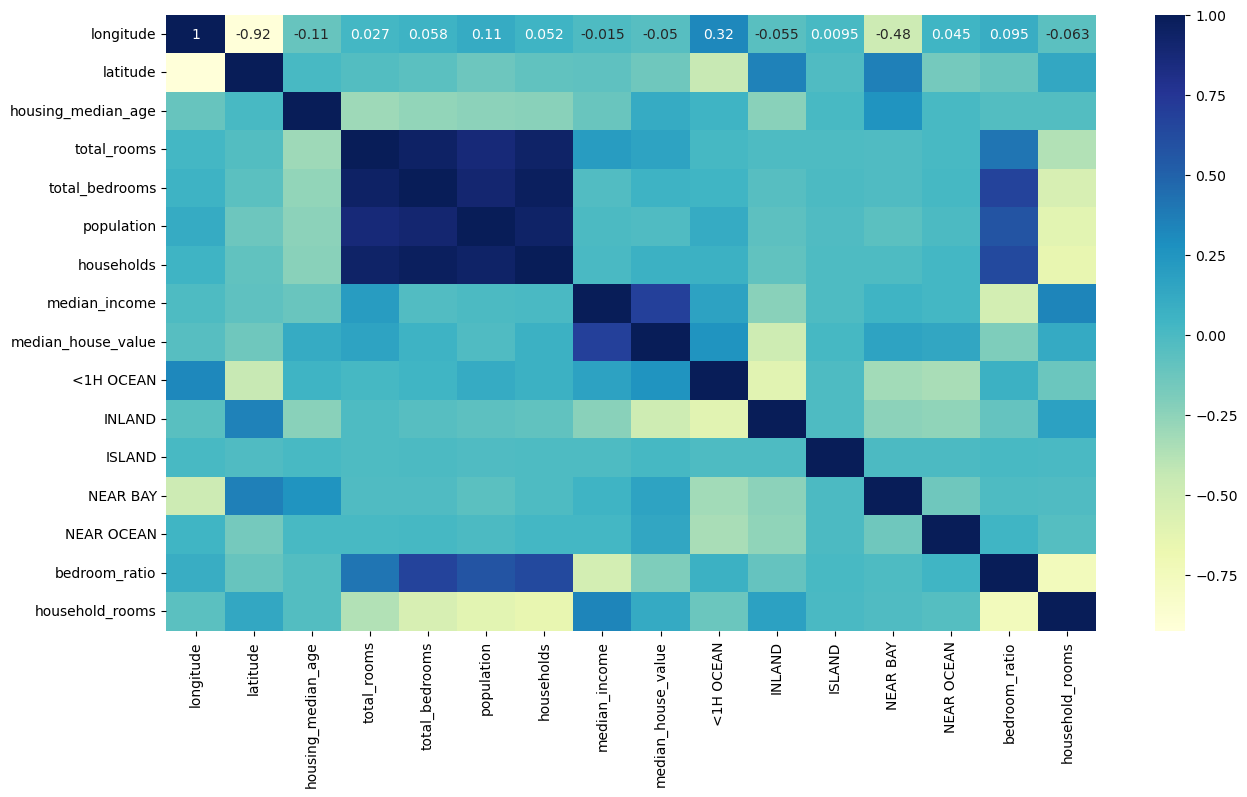

In [193]:
#now checking correlation
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only = True), cmap = "YlGnBu", annot = True)

<Axes: xlabel='latitude', ylabel='longitude'>

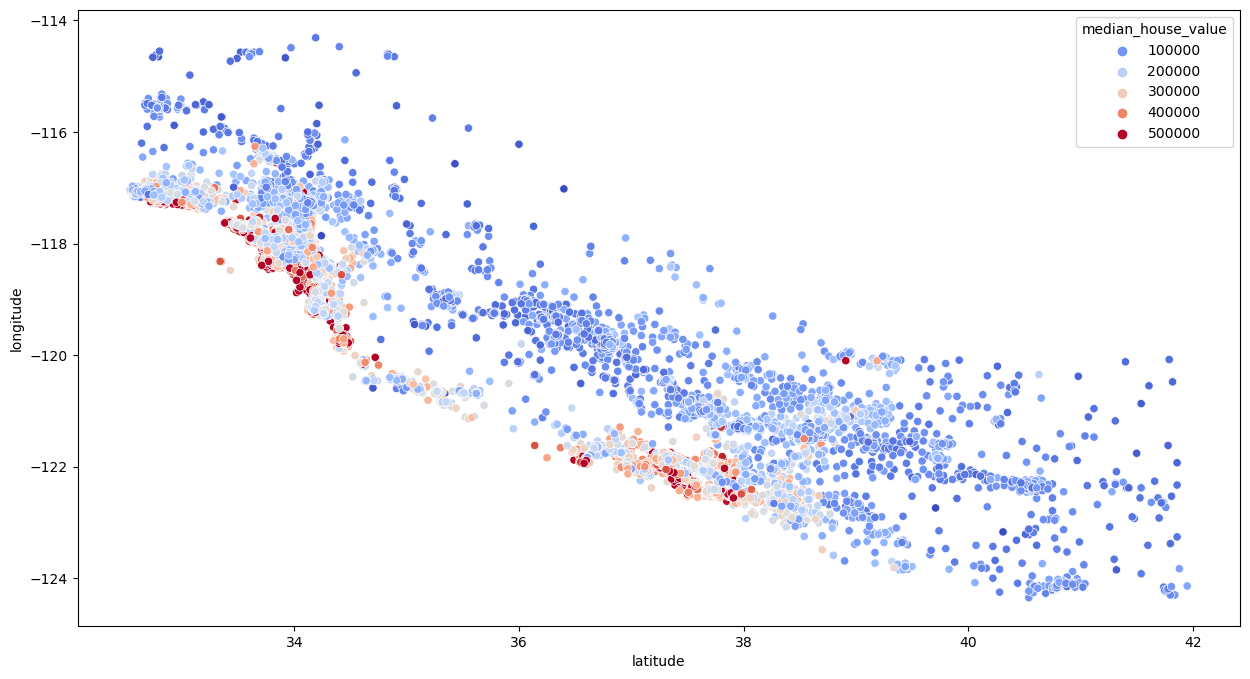

In [178]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "laitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

# FEATURE ENGINEERING

In [179]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

In [180]:
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

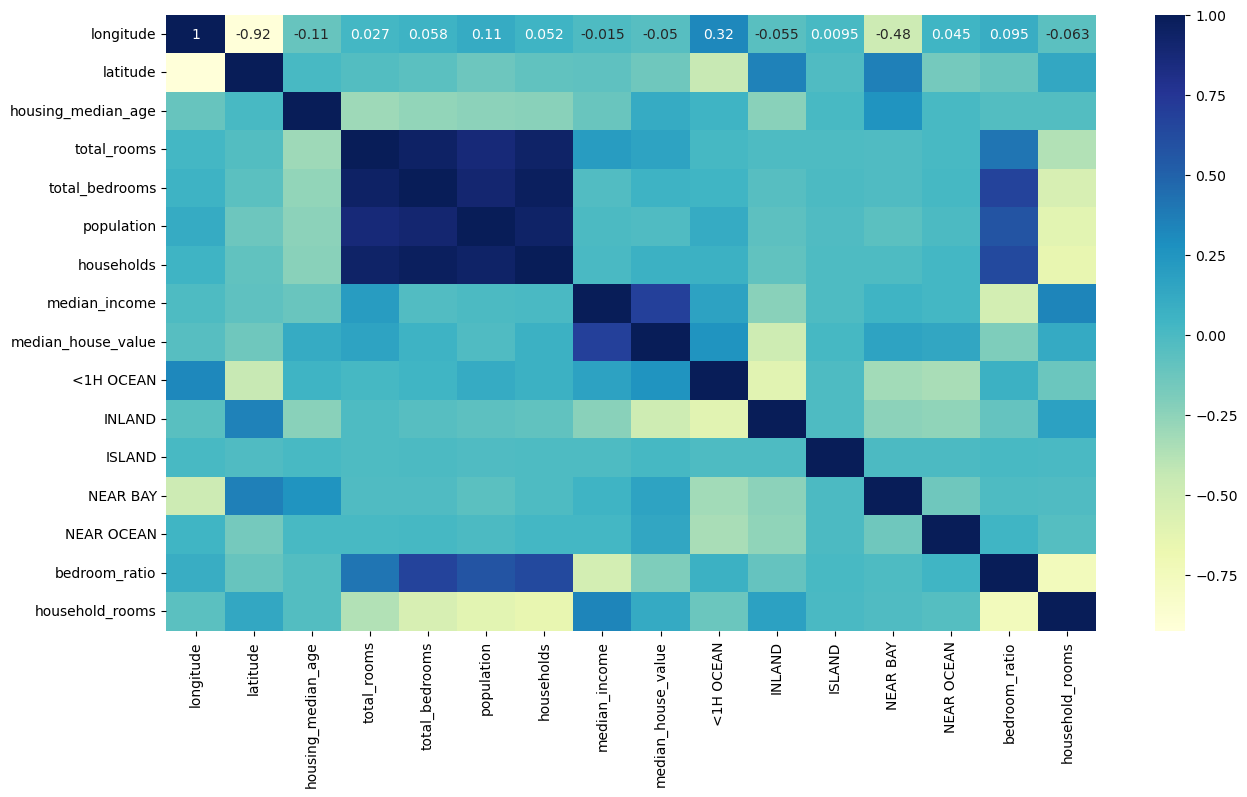

In [181]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu")


 # REGRESSION MODEL

In [182]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [186]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [187]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8214,-118.19,33.78,29.0,7.065613,5.913503,7.243513,5.924256,2.2543,156300.0,0,0,0,0,1,0.836941,1.192658
16920,-122.33,37.57,43.0,7.841493,6.432940,7.171657,6.408529,3.1111,318400.0,0,0,0,0,1,0.820372,1.223603
7846,-118.16,33.89,38.0,6.182085,4.736198,5.966147,4.691348,2.1859,143800.0,1,0,0,0,0,0.766117,1.317763
8534,-118.36,33.90,41.0,7.212294,5.857933,6.486161,5.799093,2.9551,205000.0,1,0,0,0,0,0.812215,1.243694
20354,-118.97,34.18,18.0,8.900958,6.928538,8.137396,6.965080,7.0242,293100.0,1,0,0,0,0,0.778404,1.277940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13486,-117.35,34.13,26.0,8.274102,6.347389,7.529943,6.315358,3.7286,132000.0,0,1,0,0,0,0.767139,1.310156
12697,-121.42,38.60,36.0,7.191429,5.347108,6.419995,5.442418,3.8672,111400.0,0,1,0,0,0,0.743539,1.321367
9079,-118.28,34.76,19.0,8.140607,6.400257,7.505492,6.349139,4.7875,163600.0,0,1,0,0,0,0.786214,1.282159
2590,-124.09,40.88,31.0,7.592366,6.206576,6.959399,6.148468,1.5326,74100.0,0,0,0,0,1,0.817476,1.234839


In [188]:
reg.score(X_test, y_test)

0.6666922535065675